# SVM

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [8]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# PCA
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [10]:
# 学習
model = SVC(kernel='linear')
model.fit(X_train_pc, y_train)

SVC(kernel='linear')

In [12]:
# 予測
y_pred = model.predict(X_test_pc)
accuracy_score(y_test, y_pred)

0.9111111111111111

In [13]:
# サポートベクトル
model.support_vectors_

array([[-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [ 0.68991796,  0.71639709],
       [ 1.01841242,  0.75406273],
       [ 1.14259734,  0.50582016],
       [-0.59799672, -1.47307272],
       [ 1.00108719, -1.69126085],
       [ 0.21435381, -1.74582022],
       [ 0.76807504,  0.17465618],
       [ 0.58546256, -0.11934379],
       [-0.65005847, -1.76724016],
       [ 0.78292811,  0.42709078],
       [ 1.05347893, -1.00878745],
       [ 1.24654811,  0.22456375],
       [ 0.8060938 , -0.04480644],
       [ 0.67115053,  0.36047773],
       [ 0.83577732, -1.44733591],
       [ 1.36078095,  0.15396725],
       [ 1.18175475, -0.56575389],
       [ 0.9792362 , -0.36356179],
       [ 0.21142607, -1.52270906],
       [ 1.01399725, -0.74821922],
       [ 0.86207563, -0.06985412],
       [ 1.28474342,  0.5928925 ],
       [ 1.326855  ,  0.92380604],
       [ 1.08677516, -1.21143932],
       [ 0.82552169, -0.03239705],
       [ 1.52725209,  0.96532955],
       [ 1.01399725,

## 決定境界とサポートベクトルの可視化

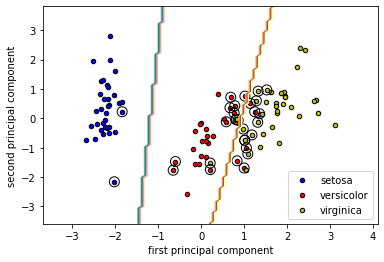

In [39]:
# 決定境界の線を引く
DecisionBoundaryDisplay.from_estimator(model,
                                       X_train_pc,
                                       plot_method='contour',
                                       # カテゴリデータに適した視覚的に明確な色のセットを提供する定性的なカラーマップ
                                       cmap=plt.cm.Paired,
                                       xlabel='first principal component',
                                       ylabel='second principal component')

# 色分けしてプロット
for class_, color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(X_train_pc[idx, 0],
                X_train_pc[idx, 1],
                c=color,
                label=class_,
                edgecolors='black',
                s=20)
plt.legend()

# マージンの中に入っているサポートベクトルを丸で囲う
plt.scatter(model.support_vectors_[:, 0],
             model.support_vectors_[:, 1],
             s=100,
             facecolor='none',
             linewidth=1,
             edgecolors='black')
plt.legend()